# Dataset analysis for wine quality

This report contains analysis results of a dataset provided to model dependencies between some wine characteristics and its subjective quality. The dataset is downloaded from UCI Machine Learning Repository as example to demonstrate data preparation techniques to perform before building any machine learning models.
The plan to analyse the dataset:
* get a quick overview on data and their statistics
* detect missed or duplicated values
* detect non-numerical data types and convert them to proper numerical types
* build detailed statistics over numerical fields to find anomalies and outliers
* run a simple regression test to confirm non-trivial dependency of the result on provided features

In [2]:
# @title
import pandas as pd

data_red = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/winequality-red.csv', sep=';')
data_white = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data/winequality-white.csv', sep=';')

data_red['Type'] = 'red'
data_white['Type'] = 'white'

data = pd.concat([data_red, data_white], ignore_index=True)


# Overview on data and their statistics

Original data consists of 2 CSV tables of the same structure but with data for red and white wine types separate. For this analysis we have extended each table with a new feature "Type" to store the color of tested wine - red or white - and concatenated the tables into a single dataframe. The result looks like the following:

In [3]:
# @title
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


First, we want to understand the stucture of our dataset.

In [ ]:
# @title
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


We see that there are 11 original features and 1 target. The last "Type" feature is from us. We keep it for the sake of readability.

# Detect missed or duplicated values

As we see from the previous report, there are no missed values in our dataset. We only need to check duplicated rows.

In [ ]:
# @title
data[data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


The analysis shows 1177 duplicated rows. After checking the data collection methodology we conclude that these duplications are not coincident: the same whine could be tested by different people and could become the same rate. This introduces a big problem to our dataset: we cannot confirm that all data are independent and identically distributed. We have a mixture of distributions presented by each testing person. To find how many distinct feature points we have, we need to exclude target from dulication search (but keep "Type").

In [ ]:
# @title
cols = data.columns
cols = cols.drop('quality')
data[data.duplicated(cols)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


Interesting. The amount of duplicated columns is the same, which means that all wines become same quality scores from experts which tasted them. This can be a significant argument that selected features are very representative and predict wine quality very well.
Let's see how many quality measurements we have for each unique wine.

In [ ]:
# @title
data_grouped = data.groupby(cols.to_list()).agg(['count', 'mean', 'std']).reset_index()
data_grouped[('quality', 'count')].value_counts()


,count
"(quality, count)",
1,4328
2,877
3,73
4,28
5,6
6,4
7,2
8,2


About 20% of wines became more than 1 measurements, 2 of them - 8 measurements and all of them are the same from different experts. This is very promising. Moreover, we can now assume that experts are not different between each other and so that our observations are trully independent and identically distributed with duplications.

# Detecting non-numerical values and converting them to numerical.

The only non-numerical type is our "Type" column which shows type of the wine: red or white. We will convert it to classical 2-class encoding {-1, 1} where -1 means white and 1 - red wine.

In [ ]:
# @title
data = data.replace(to_replace='red', value=1).replace(to_replace='white', value=-1)
data

/tmp/ipython-input-3534112096.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(to_replace='red', value=1).replace(to_replace='white', value=-1)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,-1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,-1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,-1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,-1


# Build detailed statistics over fields

Now we look at our data closely. We build detailed statistics for each feature to see how it is distributed. We will examine each field twice - for each type of wine as we do not expect that the values can be considered independently from the type. First, we do visual analysis via plotting distributions for each feature.

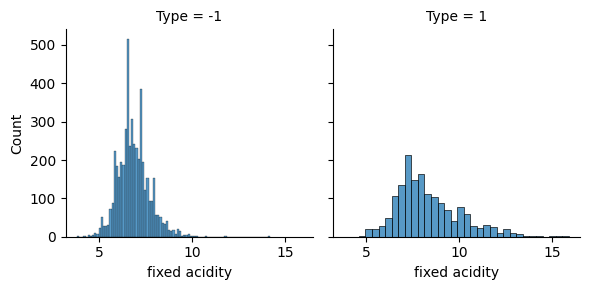

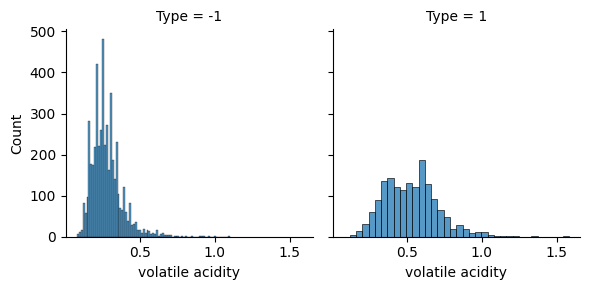

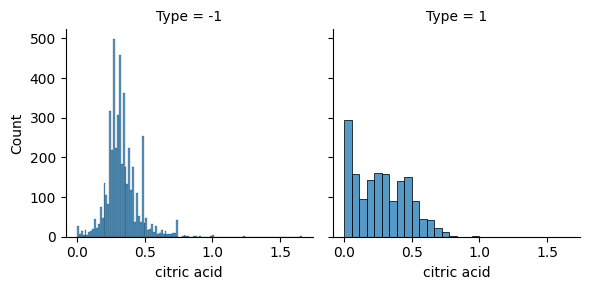

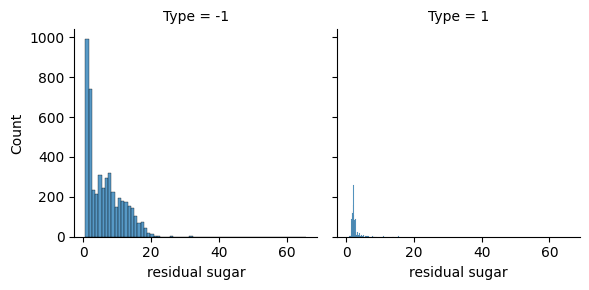

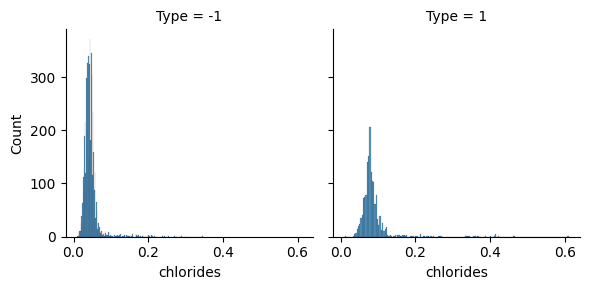

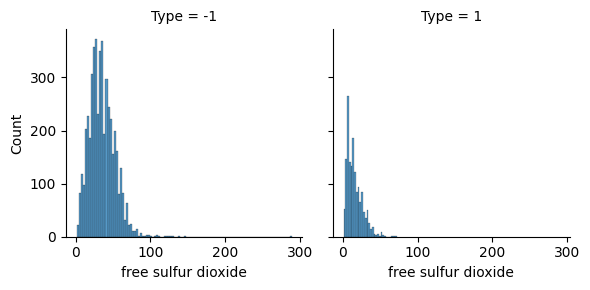

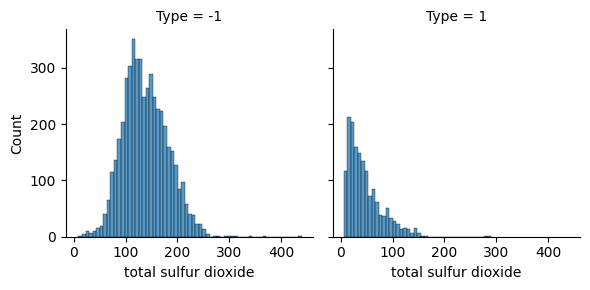

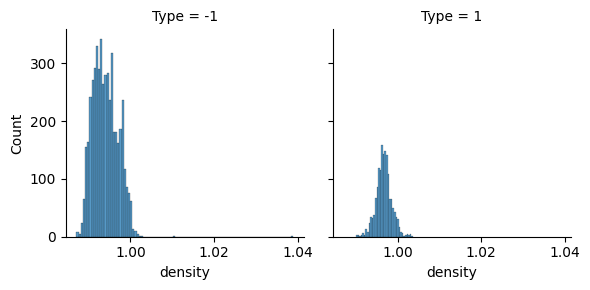

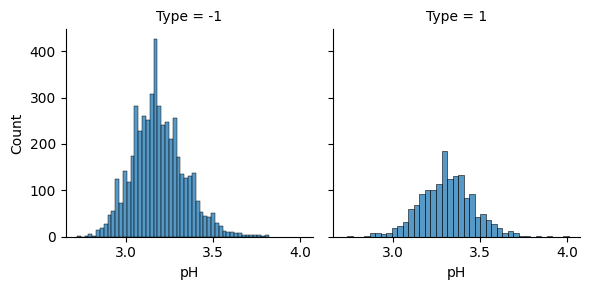

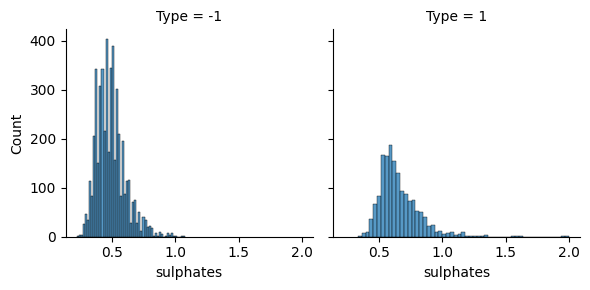

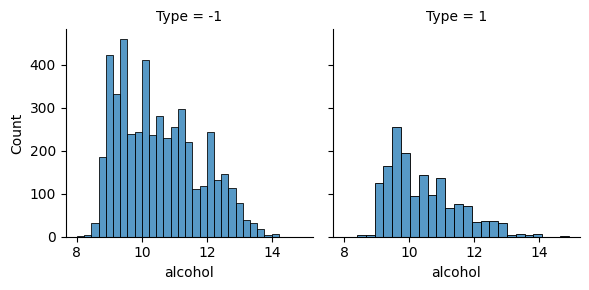

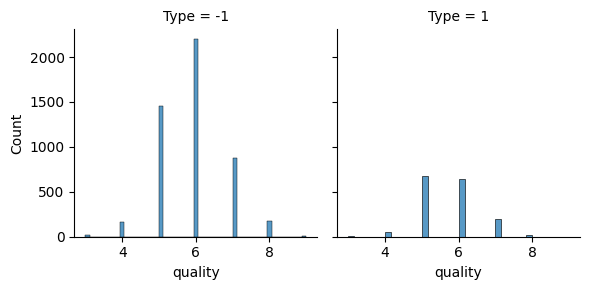

In [ ]:
# @title
import seaborn as sns
cols = data.columns.drop('Type')

for col in cols:
    fg = sns.FacetGrid(data, col='Type')
    fg.map(sns.histplot, col)

All features demonstrate an important property: they have a single well defined maximum. This means that later during modelling they can be described each with single parametrised distribution for non-negative values.
The distributions are not symmetrical - as expected - and have long right tails (except pH and alcohol features). Statistics over fields for each type for white wine:

In [ ]:
# @title
white_data = data[data['Type']==-1].drop(labels=['Type'], axis=1)
white_stat_data = white_data.describe().T
white_stat_data['z-score'] = (white_stat_data['max'] - white_stat_data['mean'])/(white_stat_data['std'])
white_stat_data

,count,mean,std,min,25%,50%,75%,max,z-score
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000,8.704217
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000,8.152811
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000,10.955302
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000,11.712916
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600,13.741673
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000,14.916791
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000,7.097720
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898,15.029763
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000,4.183648
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000,5.171074


The same for red wine:

In [ ]:
# @title
red_data = data[data['Type']==1].drop(labels=['Type'], axis=1)
red_stat_data = red_data.describe().T
red_stat_data['z-score'] = (red_stat_data['max'] - red_stat_data['mean'])/(red_stat_data['std'] )
red_stat_data

,count,mean,std,min,25%,50%,75%,max,z-score
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,4.353787
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,5.876138
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,3.742403
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,9.192806
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,11.123555
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,5.365606
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,7.372847
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,3.678904
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,4.526866
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,7.916200


We see that the tailes are indeed long: till z-score 15 for white wine and 11 for red one. We also see both from the pictures and from the statistics, that red wine needs more data to better represent its distribution.
From what we see it is very difficult to define whether data have outliers. The problem is - outstanding value does not mean something bad. Of course, there are wineries wich experiment with wine production and so their wine is different from "mass"-production. There can be regional differencies in soil or grape which result in outstanding chemical balances.
It would be benefitial to add some data about production or uniqness of a wine, to help to differentiate some "cases", like "mass"-production from unique family winery.
We will not drop any observation for now because of these reasons. We see that the quality rates for wines also have single peak and tails of exceptional quality which can be related to extreme chemical balance. But for calculation stability we apply logarithmic transformations for features with z-score more than 5 (they will be different for different wine types).
The statistics for white wine after transformation:

In [ ]:
# @title
import numpy as np

white_cols_to_trf = white_stat_data[white_stat_data['z-score']>5].T.columns
white_cols_to_multy = white_stat_data[white_stat_data['max']<3].T.columns
trf_white_data = white_data.copy()
for col in white_cols_to_trf:
  mult=1
  if col in white_cols_to_multy:
    mult = 100
  trf_white_data[col] = np.log1p(white_data[col]*mult)
white_stat_data = trf_white_data.describe().T
white_stat_data['z-score'] = (white_stat_data['max'] - white_stat_data['mean'])/(white_stat_data['std'])
white_stat_data

,count,mean,std,min,25%,50%,75%,max,z-score
fixed acidity,4898.0,2.055477,0.105954,1.568616,1.987874,2.054124,2.116256,2.721295,6.284037
volatile acidity,4898.0,3.307028,0.325336,2.197225,3.091042,3.295837,3.496508,4.709530,4.310941
citric acid,4898.0,3.467218,0.431780,0.000000,3.332205,3.496508,3.688879,5.117994,3.823184
residual sugar,4898.0,1.752173,0.723382,0.470004,0.993252,1.824549,2.388763,4.201703,3.386222
chlorides,4898.0,1.673561,0.274350,0.641854,1.526056,1.667707,1.791759,3.572346,6.921038
free sulfur dioxide,4898.0,3.472325,0.521578,1.098612,3.178054,3.555348,3.850148,5.669881,4.213284
total sulfur dioxide,4898.0,4.886334,0.332704,2.302585,4.691348,4.905275,5.123964,6.089045,3.614955
density,4898.0,4.609185,0.002975,4.602276,4.606891,4.608903,4.611252,4.652988,14.725235
pH,4898.0,3.188267,0.151001,2.720000,3.090000,3.180000,3.280000,3.820000,4.183648
sulphates,4898.0,3.887247,0.219210,3.135494,3.737670,3.871201,4.025352,4.691348,3.668166


The same for red whine:

In [ ]:
# @title
red_cols_to_trans = red_stat_data[red_stat_data['z-score']>5].T.columns
red_cols_to_multy = red_stat_data[red_stat_data['max']<3].T.columns
trf_red_data = red_data.copy()
for col in red_cols_to_trans:
  mult=1
  if col in red_cols_to_multy:
    mult=100
  trf_red_data[col] = np.log1p(red_data[col]*mult)
red_stat_data = trf_red_data.describe().T
red_stat_data['z-score'] = (red_stat_data['max'] - red_stat_data['mean'])/(red_stat_data['std'])
red_stat_data

,count,mean,std,min,25%,50%,75%,max,z-score
fixed acidity,1599.0,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000,4.353787
volatile acidity,1599.0,3.927869,0.345679,2.564949,3.688879,3.970292,4.174387,5.068904,3.300850
citric acid,1599.0,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000,3.742403
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360,5.871888
chlorides,1599.0,2.219912,0.296262,0.788457,2.079442,2.186051,2.302585,4.128746,6.443050
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459,2.647439
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881,2.981552
density,1599.0,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690,3.678904
pH,1599.0,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000,4.526866
sulphates,1599.0,4.175758,0.220358,3.526361,4.025352,4.143135,4.304065,5.303305,5.116893


Now we have only 1 feature with extreme long tail - density for white wines. We will investigate the role of those extreme values later during modeling. Before we move to that step we want to inspect features correlations and mutual dependencies to check, whether we can either reject some features or add new ones to better fit the model later. Classical scatter plots grid for white wines (with already transformed features):

In [ ]:
# @title
sns.pairplot(trf_white_data, hue='quality')

Output hidden; open in https://colab.research.google.com to view.

Pairplots for red wine:

In [ ]:
# @title
sns.pairplot(trf_red_data, hue='quality')

Output hidden; open in https://colab.research.google.com to view.

First, we can clearly see a single outlier for density feature in white wines. We will remove it only for this analysis but we will investigate hiw role in later in modeling.
Second, we now better see the shapes of single features distributions and notice that residual sugar level in white wine and ciric acid in red wine tend to be multimodal - they have several peaks. Alcohol level for both wine types demonstrates dependency of distribution on quality - the more quality is given to a wine the larger is the mean alcohol. This is logical - aged wines are known to be of higher qualities.
More important is to notice that no pairs of fetures demonstrate clear interdependency. The only trend we can see is between total sulphur dioxide and free sulphur dioxide, what is expected. Also, we cannot clearly see nonlinearities, so we will not reject or add features for now.
After removal of the outlier for density from white wine dataset its parplots graphs are following:

In [ ]:
# @title
max_dens = trf_white_data[trf_white_data['density'] == trf_white_data['density'].max()].index
droped_trf_white_data = trf_white_data.drop(max_dens)
sns.pairplot(droped_trf_white_data, hue='quality')

Output hidden; open in https://colab.research.google.com to view.

We have visually tested our features for paired correlations. More complex mutual dependencies we can reveal through so-called dimensionality reduction technique. For more information read a special literature. Here we apply this technique to see the potential to reduce the complexity of future model. We will intermediately scale our features using standard scaler, but we will use these data only for this analisys, not for the training. The following graph shows the dependency of reconstruction quality on the number of so-called principal components for white whine:

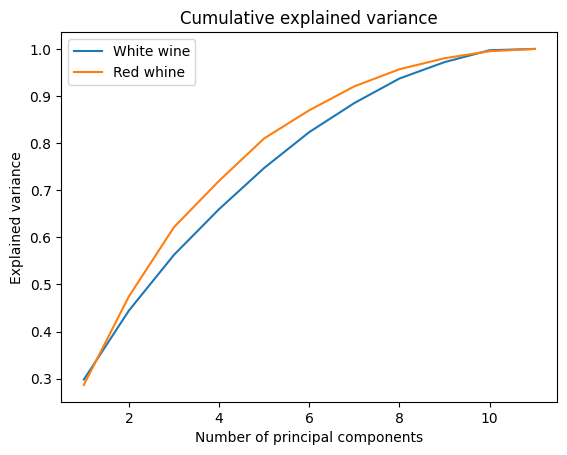

In [ ]:
# @title
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_white = droped_trf_white_data.drop('quality', axis=1).copy()
y_white = droped_trf_white_data['quality']

scaler = StandardScaler()
X_white_sc = scaler.fit_transform(X_white.astype(np.float64))

pca_w = PCA()
pca_w.fit(X_white_sc)
cumsum_w = np.cumsum(pca_w.explained_variance_ratio_)


plt.plot(
    range(1, cumsum_w.shape[0] + 1),
    cumsum_w,
    label='White wine'
)


X_red = trf_red_data.drop('quality', axis=1).copy()
y_red = trf_red_data['quality']

X_red_sc = scaler.fit_transform(X_red.astype(np.float64))

pca_r = PCA()
pca_r.fit(X_red_sc)
cumsum_r = np.cumsum(pca_r.explained_variance_ratio_)


plt.plot(
    range(1, cumsum_r.shape[0] + 1),
    cumsum_r,
    label='Red whine'
)
# Axes labels
plt.xlabel("Number of principal components")   # x-axis label
plt.ylabel("Explained variance")  # y-axis label

# Title (optional)
plt.title("Cumulative explained variance")
plt.legend()
plt.show()

The graphs are very similar and show some potential to reduce the number of features by their linear combinations. In both cases we can go down to 6 new features to keep the "reconstruction" quality above 0.8. We will discover this in detail during modeling step.

# Run linear regression test

The last what we will do is running simple linear regression model test to confirm that our features show non-trivial dependency to the target. We well use the same datasets as for principal components analysis and f-test criteria to define whether we have non-trivial dependency. The results for white wine:

In [ ]:
# @title
import statsmodels.api as sm

X_sm_w = sm.add_constant(X_white)
model_sm_w = sm.OLS(y_white, X_sm_w).fit()
print(model_sm_w.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     190.7
Date:                Thu, 14 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:20:13   Log-Likelihood:                -5479.2
No. Observations:                4897   AIC:                         1.098e+04
Df Residuals:                    4885   BIC:                         1.106e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  501.2860 

And for the red wine:

In [ ]:
# @title
X_sm_r = sm.add_constant(X_red)
model_sm_r = sm.OLS(y_red, X_sm_r).fit()
print(model_sm_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     82.49
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          3.37e-147
Time:                        09:23:09   Log-Likelihood:                -1565.1
No. Observations:                1599   AIC:                             3154.
Df Residuals:                    1587   BIC:                             3219.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.2523 

Both models show almost zero (technically zero for white wine) probability that there is only trivial dependency between our features and target value. The overall score of "fittness" though is relatively low - about 0.3 for white wine and 0.36 for red one. This only tells us that there is no "out of the box" solution to this problem and we need to investigate the dependency further during more precise modeling.